In [93]:
import pandas
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import joblib

In [94]:
data_kepler_df = pandas.read_csv('Data\Kepler.csv')
#data_tess_df = pandas.read_csv('Data\TESS.csv')
#data_k2_df = pandas.read_csv('Data\K2.csv')

data_kepler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [95]:
# Remove unnecessary data
data_kepler_df = data_kepler_df.drop(columns=['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_tce_delivname'])
# Remove empty data
data_kepler_df = data_kepler_df.drop(columns=['koi_teq_err1', 'koi_teq_err2'])

In [96]:
# Null Values
print("Count of null values in each column:")
print(data_kepler_df.isna().sum())

Count of null values in each column:
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
k

In [97]:
data_kepler_df = data_kepler_df.dropna()
row_count = len(data_kepler_df)
print("Count of total rows:",row_count)

Count of total rows: 7803


In [100]:
variables = data_kepler_df.drop(columns=['koi_pdisposition'])
target = data_kepler_df['koi_pdisposition']
variables_train, variables_test, target_train, target_test = train_test_split(variables,target,test_size=0.4,random_state=3)

In [101]:
scaler = preprocessing.StandardScaler()
scaler.fit(variables_train)
variables_st = pandas.DataFrame(scaler.transform(variables), columns = variables.columns)
variables_st.index = variables.index
variables_train_st = variables_st.loc[variables_train.index]
variables_test_st = variables_st.loc[variables_test.index]

In [102]:
exoplanet_svm_model = OneVsOneClassifier(LinearSVC(random_state = 1, max_iter = 200))
exoplanet_svm_model.fit(variables_train_st, target_train)

target_test_prediction = exoplanet_svm_model.predict(variables_test_st)

In [103]:
accuracy = accuracy_score(target_test,target_test_prediction)*100
print("Accuracy: ", accuracy)

Accuracy:  97.2773862908392


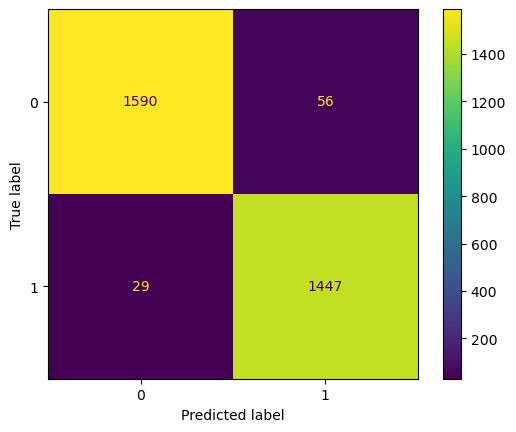

In [104]:
confusion_mat = confusion_matrix(target_test,target_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
disp.plot()

In [105]:
print(classification_report(target_test,target_test_prediction))

                precision    recall  f1-score   support

     CANDIDATE       0.98      0.97      0.97      1646
FALSE POSITIVE       0.96      0.98      0.97      1476

      accuracy                           0.97      3122
     macro avg       0.97      0.97      0.97      3122
  weighted avg       0.97      0.97      0.97      3122

